In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
df_311NYC = pd.read_csv(r'C:\Users\Manaralbogamii\Desktop\Data sceince\311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#view Read Top 5 records
df_311NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
# Check shape 
df_311NYC.shape

(300698, 53)

In [7]:
#See columns
df_311NYC.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
# First we should check which column has how many missing values
df_311NYC.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [10]:
 #As we seen Closed Date is important column and have many missing values
df_311NYC[df_311NYC['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_311NYC[df_311NYC['Unique Key']==32305700]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#We check data type of each column
df_311NYC.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [14]:
# Question 2.) Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
import datetime as dt
import time , datetime
#convert the columns ‘Created Date’ and Closed Date’ to datetime datatype
df_311NYC['Created Date'] =pd.to_datetime(df_311NYC['Created Date'])
df_311NYC['Created Date'].dtype

dtype('<M8[ns]')

In [15]:
#convert the columns and Closed Date’ to datetime datatype
df_311NYC['Closed Date'] =pd.to_datetime(df_311NYC['Closed Date'])
df_311NYC['Closed Date'].dtype

dtype('<M8[ns]')

In [17]:
#create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
df_311NYC['Request_Closing_Time'] =df_311NYC['Closed Date'] -df_311NYC['Created Date']

df_311NYC['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [30]:
#Provide major insights/patterns that you can offer in a visual format (graphs or tables);
#at least 4 major conclusions that you can come up with after generic data mining


def hour (timeD):
    days =timeD.days
    hours=round(timeD.seconds/3600,2)
    result=(days*24)+hours
    #print(days)
    #print(hours)
    return result

In [34]:
# Test
testDays = df_311NYC[df_311NYC['Unique Key'] == 32122264]['Request_Closing_Time']
print(hour(testDays[27704]))
print(testDays[27704])
print(testDays.dtype)

145.08
6 days 01:05:00
timedelta64[ns]


In [35]:
df_311NYC['Request_Closing_In_Hr'] = df_311NYC['Request_Closing_Time'].apply(hour)

df_311NYC['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [36]:
import math

In [44]:
# Function to categorize hours
#fast ,Acceptable,slow,very slow

def categorize_hours(hour):
     if (math.isnan(hour)):
        return 'Unspecified'
     elif(hour<2.0):
        return 'Fast'
     elif(4.0>hour>=2.0):
        return 'Acceptable'
     elif (6.0 > hour>= 4.0):
        return 'Slow'
     else:
        return 'Very Slow'
print(categorize_hours(1.99))
# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

df_311NYC['Request_Closing_Time_Category'] = df_311NYC['Request_Closing_In_Hr'].apply(categorize_hours)

df_311NYC['Request_Closing_Time_Category'].head()

Fast


0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

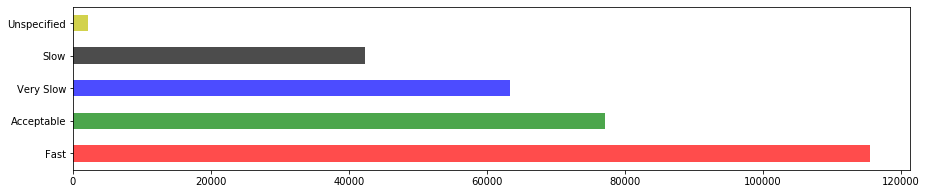

In [47]:
df_311NYC['Request_Closing_Time_Category'].value_counts()
# Create Bar plot 
df_311NYC['Request_Closing_Time_Category'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=0.7, figsize=(15,3))
plt.show()

In [48]:
df_311NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_In_Hr,Request_Closing_Time_Category
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,0.92,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,1.44,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,4.86,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,7.75,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,3.45,Acceptable


In [ ]:
# insights
# We will create one column with Create_Month name

# Created Series for months in text format
month = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(month)
print(month[12])